### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [86]:
print("--- RANKING DE FACTURACIÓN ---")
facturacion = {}

for nombre, df in dfs.items():
    total = df['Precio'].sum()
    facturacion[nombre] = total

# Convertimos a Serie para visualizar mejor y ordenamos de mayor a menor
ranking_facturacion = pd.Series(facturacion).sort_values(ascending=False)

# Formato de moneda para que se vea profesional
print(ranking_facturacion.apply(lambda x: "${:,.0f}".format(x)))

--- RANKING DE FACTURACIÓN ---
Tienda 1    $1,150,880,400
Tienda 2    $1,116,343,500
Tienda 3    $1,098,019,600
Tienda 4    $1,038,375,700
dtype: object


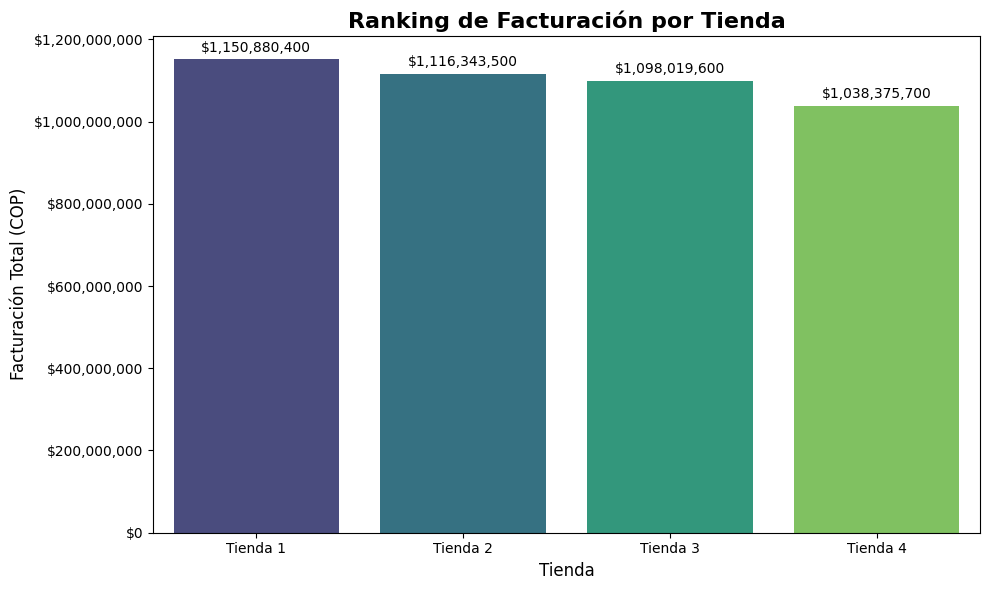

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=ranking_facturacion.index, y=ranking_facturacion.values, hue=ranking_facturacion.index, palette='viridis', legend=False)
plt.title('Ranking de Facturación por Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Facturación Total (COP)', fontsize=12)

# Formatear el eje Y como moneda
fmt = '${x:,.0f}'
tick = mticker.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Añadir etiquetas de datos en las barras
for index, value in enumerate(ranking_facturacion.values):
    ax.text(index, value + (ranking_facturacion.max() * 0.01), f'${value:,.0f}', color='black', ha="center", va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
print("--- CATEGORÍA MÁS POPULAR POR TIENDA ---")

for nombre, df in dfs.items():
    # value_counts() cuenta las ocurrencias, idxmax() toma el nombre de la mayor
    top_cat = df['Categoría del Producto'].value_counts().idxmax()
    cantidad = df['Categoría del Producto'].value_counts().max()
    print(f"{nombre}: {top_cat} ({cantidad} ventas)")

--- CATEGORÍA MÁS POPULAR POR TIENDA ---
Tienda 1: Muebles (465 ventas)
Tienda 2: Muebles (442 ventas)
Tienda 3: Muebles (499 ventas)
Tienda 4: Muebles (480 ventas)


### 2.1 Categoría menos popular por tienda

In [ ]:
print("--- CATEGORÍA MENOS POPULAR POR TIENDA ---")

for nombre, df in dfs.items():
    # value_counts() cuenta las ocurrencias, idxmin() toma el nombre de la menor
    bottom_cat = df['Categoría del Producto'].value_counts().idxmin()
    cantidad = df['Categoría del Producto'].value_counts().min()
    print(f"{nombre}: {bottom_cat} ({cantidad} ventas)")

--- CATEGORÍA MENOS POPULAR POR TIENDA ---
Tienda 1: Artículos para el hogar (171 ventas)
Tienda 2: Artículos para el hogar (181 ventas)
Tienda 3: Instrumentos musicales (177 ventas)
Tienda 4: Instrumentos musicales (170 ventas)


### 2.2 Categorías más populares por tienda


In [ ]:
print("--- TOP 3 CATEGORÍAS MÁS POPULARES POR TIENDA ---")

# Definimos cuántas categorías queremos mostrar
num_top_categories = 3

for nombre, df in dfs.items():
    print(f"\n{nombre}:")
    # value_counts() cuenta las ocurrencias, nlargest() toma las N mayores
    top_categories = df['Categoría del Producto'].value_counts().nlargest(num_top_categories)
    for cat, count in top_categories.items():
        print(f"  - {cat} ({count} ventas)")

--- TOP 3 CATEGORÍAS MÁS POPULARES POR TIENDA ---

Tienda 1:
  - Muebles (465 ventas)
  - Electrónicos (448 ventas)
  - Juguetes (324 ventas)

Tienda 2:
  - Muebles (442 ventas)
  - Electrónicos (422 ventas)
  - Juguetes (313 ventas)

Tienda 3:
  - Muebles (499 ventas)
  - Electrónicos (451 ventas)
  - Juguetes (315 ventas)

Tienda 4:
  - Muebles (480 ventas)
  - Electrónicos (451 ventas)
  - Juguetes (338 ventas)


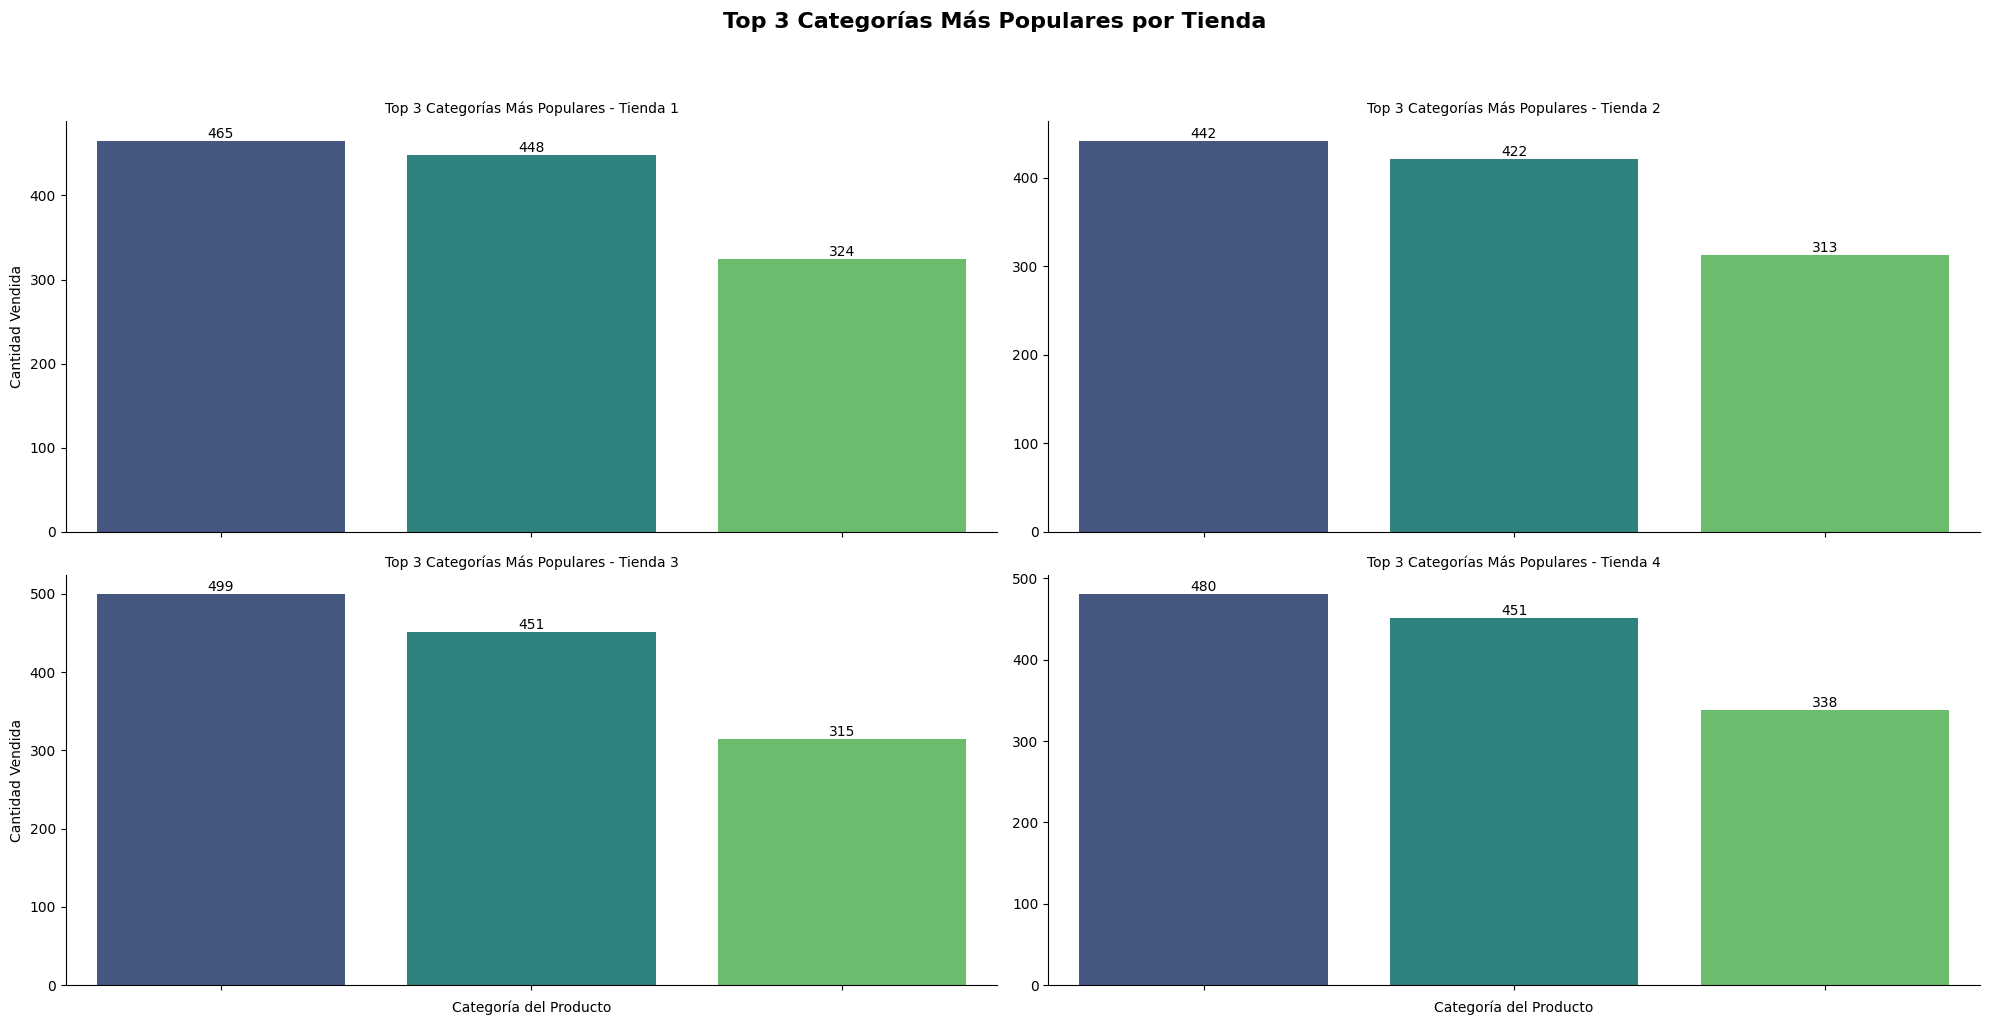

In [82]:
# Definimos cuántas categorías queremos mostrar
num_top_categories = 3

# Creamos una lista para almacenar los top 3 de cada tienda
top_categories_data = []

for nombre, df in dfs.items():
    # value_counts() cuenta las ocurrencias, nlargest() toma las N mayores
    top_categories = df['Categoría del Producto'].value_counts().nlargest(num_top_categories).reset_index()
    top_categories.columns = ['Categoría del Producto', 'Cantidad Vendida']
    top_categories['Tienda'] = nombre
    top_categories_data.append(top_categories)

# Concatenamos todos los DataFrames en uno solo
df_top_categories = pd.concat(top_categories_data, ignore_index=True)

# Creamos los gráficos de barras facetados (uno por tienda)
g = sns.catplot(
    data=df_top_categories,
    x='Categoría del Producto',
    y='Cantidad Vendida',
    col='Tienda',
    col_wrap=2, # Muestra 2 gráficos por fila
    kind='bar',
    palette='viridis',
    height=5, # Altura de cada subplot
    aspect=2.0, # Aumenta el aspecto para dar más espacio horizontal
    sharey=False, # Permite que cada gráfico tenga su propio eje y
    legend=False, # Desactivar la leyenda si no es necesaria
    hue='Categoría del Producto' # Para asignar colores distintos a cada categoría y evitar FutureWarning
)

# Ajustamos los títulos y etiquetas para mayor claridad
g.set_axis_labels('Categoría del Producto', 'Cantidad Vendida')
g.set_titles('Top 3 Categorías Más Populares - {col_name}')

# Rotar etiquetas del eje X para que sean horizontales y añadir etiquetas de cantidad en las barras
for ax in g.axes.flat:
    # Obtener los ticks actuales y luego establecerlos explícitamente antes de cambiar las etiquetas
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center') # Rotación 0 y alineación central
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', label_type='edge') # Añade etiquetas de cantidad en las barras

plt.suptitle('Top 3 Categorías Más Populares por Tienda', y=1.02, fontsize=16, fontweight='bold')

# Mejora el diseño para evitar que las etiquetas se superpongan
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Muestra el gráfico
plt.show()

### 2.3 Ventas Totales por Categoría para Cada Tienda

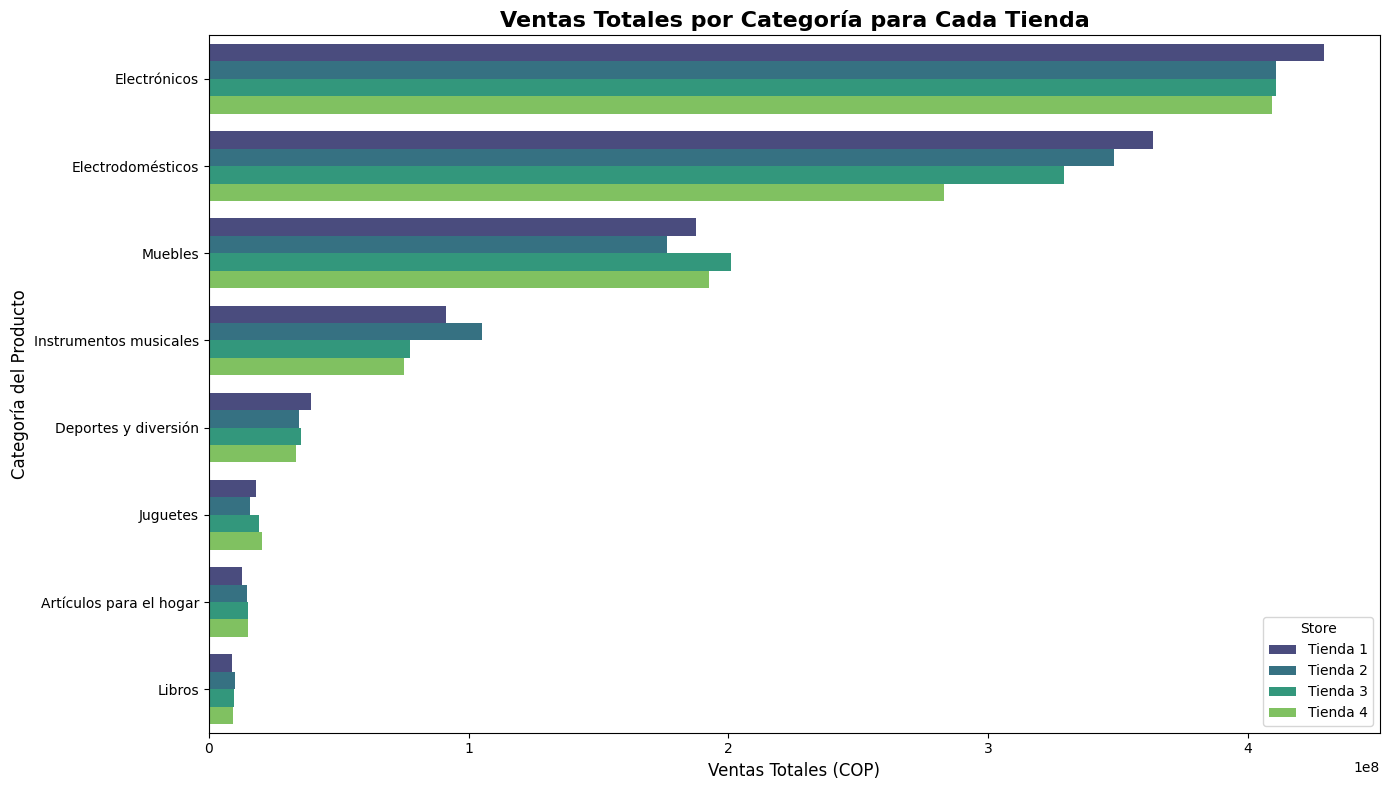

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establece un tamaño de figura más grande para una mejor legibilidad
plt.figure(figsize=(14, 8))

# Crea el gráfico de barras agrupado usando seaborn
sns.barplot(
    data=combined_sales_df,
    x='Precio',
    y='Categoría del Producto',
    hue='Store',
    palette='viridis'
)

# Añade título y etiquetas para mayor claridad
plt.title('Ventas Totales por Categoría para Cada Tienda', fontsize=16, fontweight='bold')
plt.xlabel('Ventas Totales (COP)', fontsize=12)
plt.ylabel('Categoría del Producto', fontsize=12)

# Mejora el diseño para evitar que las etiquetas se superpongan
plt.tight_layout()

# Muestra el gráfico
plt.show()

# 3. Calificación promedio de la tienda


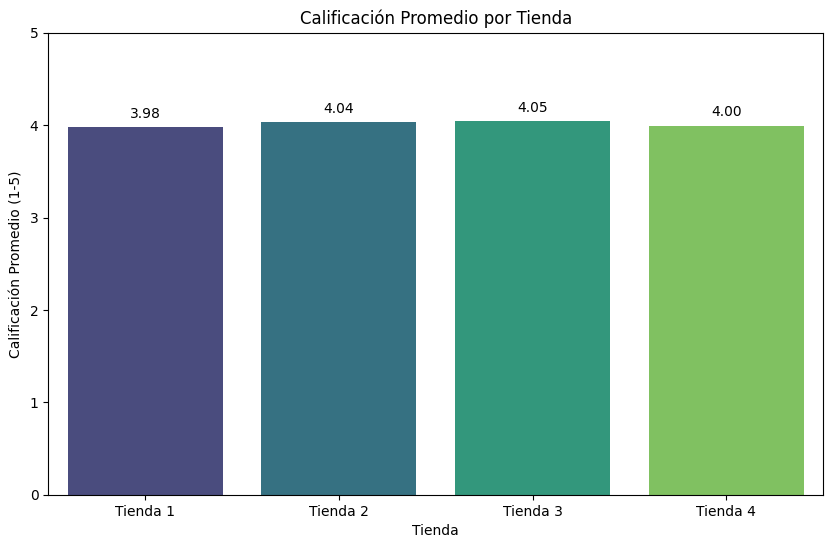

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all store dataframes into a single dataframe with a 'Tienda' identifier
all_stores_df = []
for nombre, df in dfs.items():
    df_temp = df.copy() # Work on a copy to avoid modifying original dfs
    df_temp['Tienda'] = nombre
    all_stores_df.append(df_temp)

df_total = pd.concat(all_stores_df, ignore_index=True)

# Promedio de calificación
calificacion_promedio = df_total.groupby('Tienda')['Calificación'].mean()

# Gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=calificacion_promedio.index, y=calificacion_promedio.values, hue=calificacion_promedio.index, palette='viridis', legend=False)
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio (1-5)')
plt.xlabel('Tienda')
plt.ylim(0, 5) # Escala real de calificación

# Añadir el resultado promedio en número para cada barra
for index, value in enumerate(calificacion_promedio.values):
    ax.text(index, value + 0.1, f'{value:.2f}', color='black', ha="center")

plt.show()

# 4. Productos más y menos vendidos

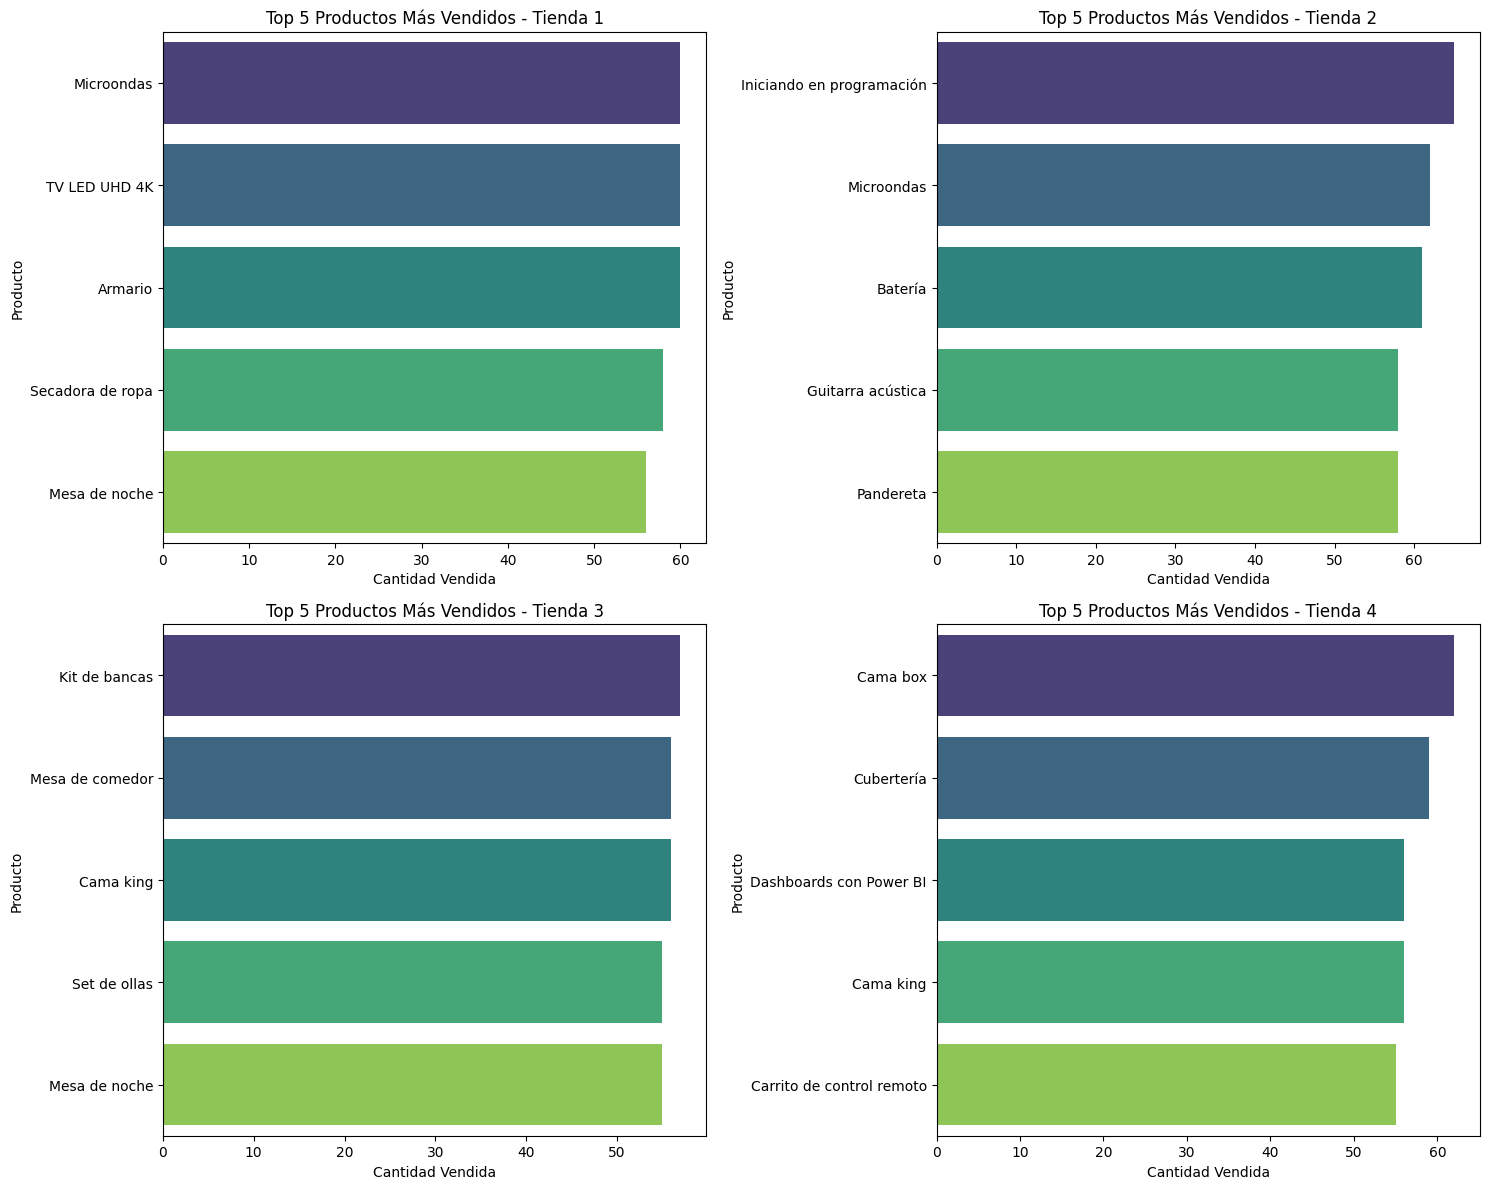

Menos vendidos en Tienda 1:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64
Menos vendidos en Tienda 2:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64
Menos vendidos en Tienda 3:
Producto
Guitarra eléctrica         38
Set de vasos               36
Mochila                    36
Microondas                 36
Bloques de construcción    35
Name: count, dtype: int64
Menos vendidos en Tienda 4:
Producto
Refrigerador                   38
Ciencia de datos con Python    38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33
Name: count, dtype: int64


In [ ]:
# Gráfico de los Top 5 productos más vendidos por tienda
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, tienda in enumerate(df_total['Tienda'].unique()):
    df_tienda = df_total[df_total['Tienda'] == tienda]
    # Top 5 más vendidos
    top_productos = df_tienda['Producto'].value_counts().head(5)

    sns.barplot(x=top_productos.values, y=top_productos.index, hue=top_productos.index, ax=axes[i], palette='viridis', legend=False)
    axes[i].set_title(f'Top 5 Productos Más Vendidos - {tienda}')
    axes[i].set_xlabel('Cantidad Vendida')
    axes[i].set_ylabel('Producto')

plt.tight_layout()
plt.show()

# Para obtener los menos vendidos (código de análisis):
for tienda in df_total['Tienda'].unique():
     df_tienda = df_total[df_total['Tienda'] == tienda]
     menos_vendidos = df_tienda['Producto'].value_counts().tail(5)
     print(f"Menos vendidos en {tienda}:\n{menos_vendidos}")

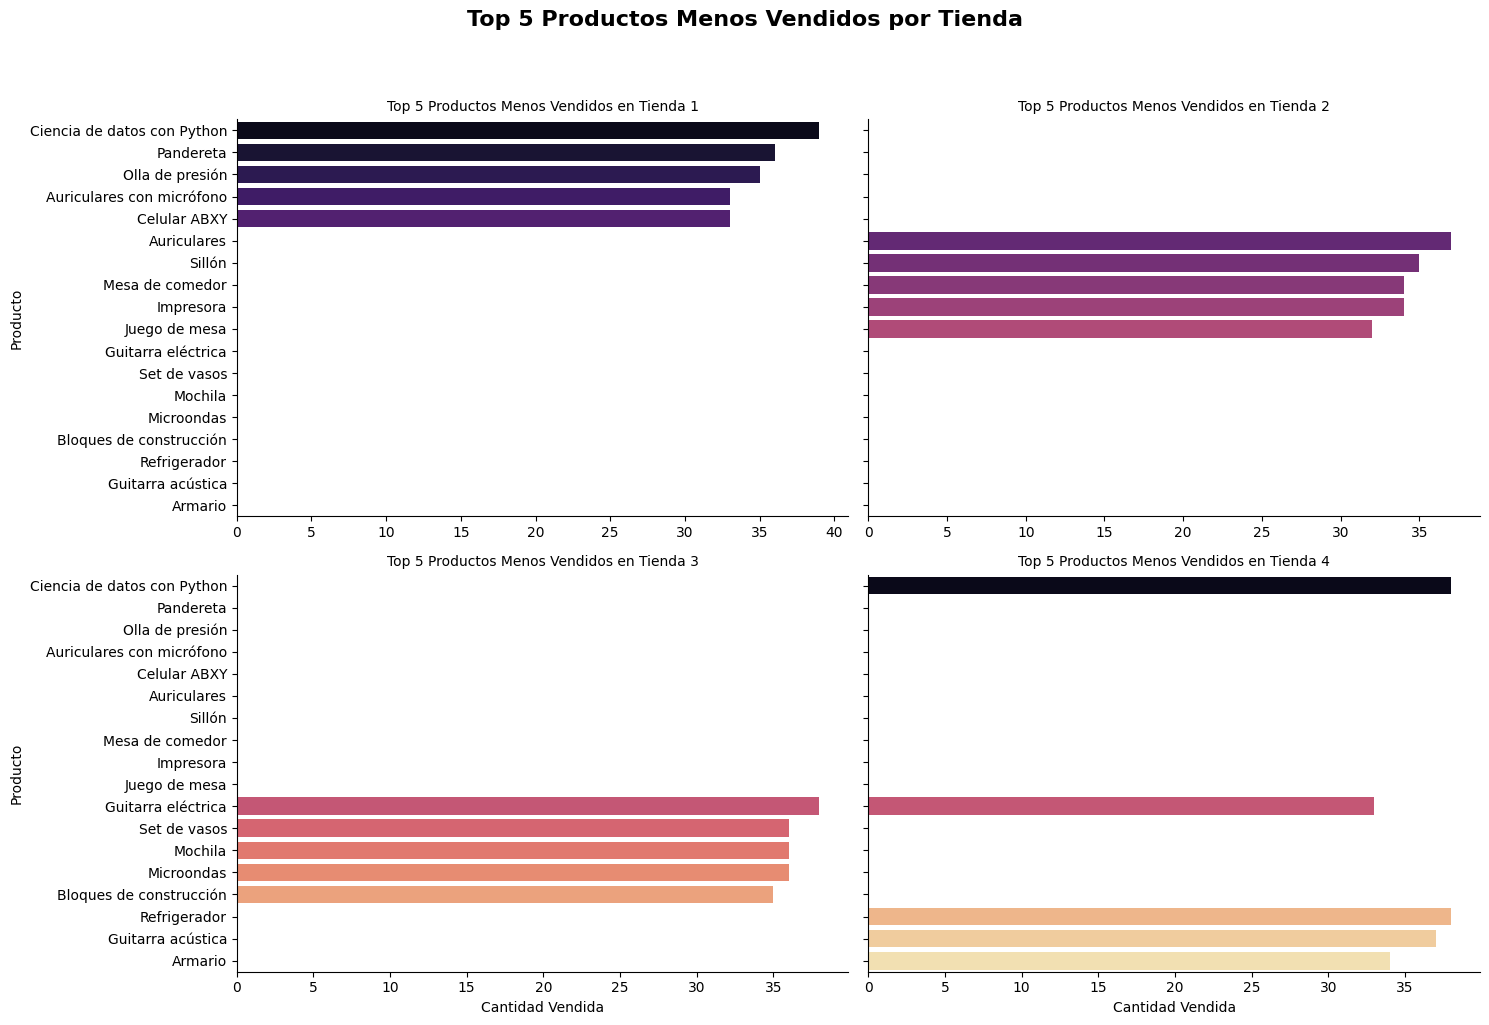

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 5 productos menos vendidos por tienda
bottom_productos_por_tienda = []
for nombre_tienda in df_total['Tienda'].unique():
    df_tienda = df_total[df_total['Tienda'] == nombre_tienda]
    # value_counts().tail(5) para obtener los 5 productos menos vendidos
    bottom_productos = df_tienda['Producto'].value_counts().tail(5).reset_index()
    bottom_productos.columns = ['Producto', 'Cantidad Vendida']
    bottom_productos['Tienda'] = nombre_tienda
    bottom_productos_por_tienda.append(bottom_productos)

df_bottom_productos = pd.concat(bottom_productos_por_tienda, ignore_index=True)

# Crear los gráficos de barras facetados para cada tienda
g = sns.catplot(
    data=df_bottom_productos,
    x='Cantidad Vendida',
    y='Producto',
    hue='Producto', # Para asignar colores distintos a cada producto
    col='Tienda',
    col_wrap=2, # Muestra 2 gráficos por fila
    kind='bar',
    palette='magma', # Un palette diferente para distinguirlo del top ventas
    height=5, # Altura de cada subplot
    aspect=1.5, # Relación de aspecto de cada subplot
    sharex=False, # Permite que cada gráfico tenga su propio eje x
    legend=False # Desactivar la leyenda, ya que los productos están en el eje y
)

# Añade títulos y etiquetas para mayor claridad
g.set_axis_labels('Cantidad Vendida', 'Producto')
g.set_titles('Top 5 Productos Menos Vendidos en {col_name}')

plt.suptitle('Top 5 Productos Menos Vendidos por Tienda', y=1.02, fontsize=16, fontweight='bold')

# Mejora el diseño para evitar que las etiquetas se superpongan
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Muestra el gráfico
plt.show()

### 4.1 top 5 productos más vendidos por tienda

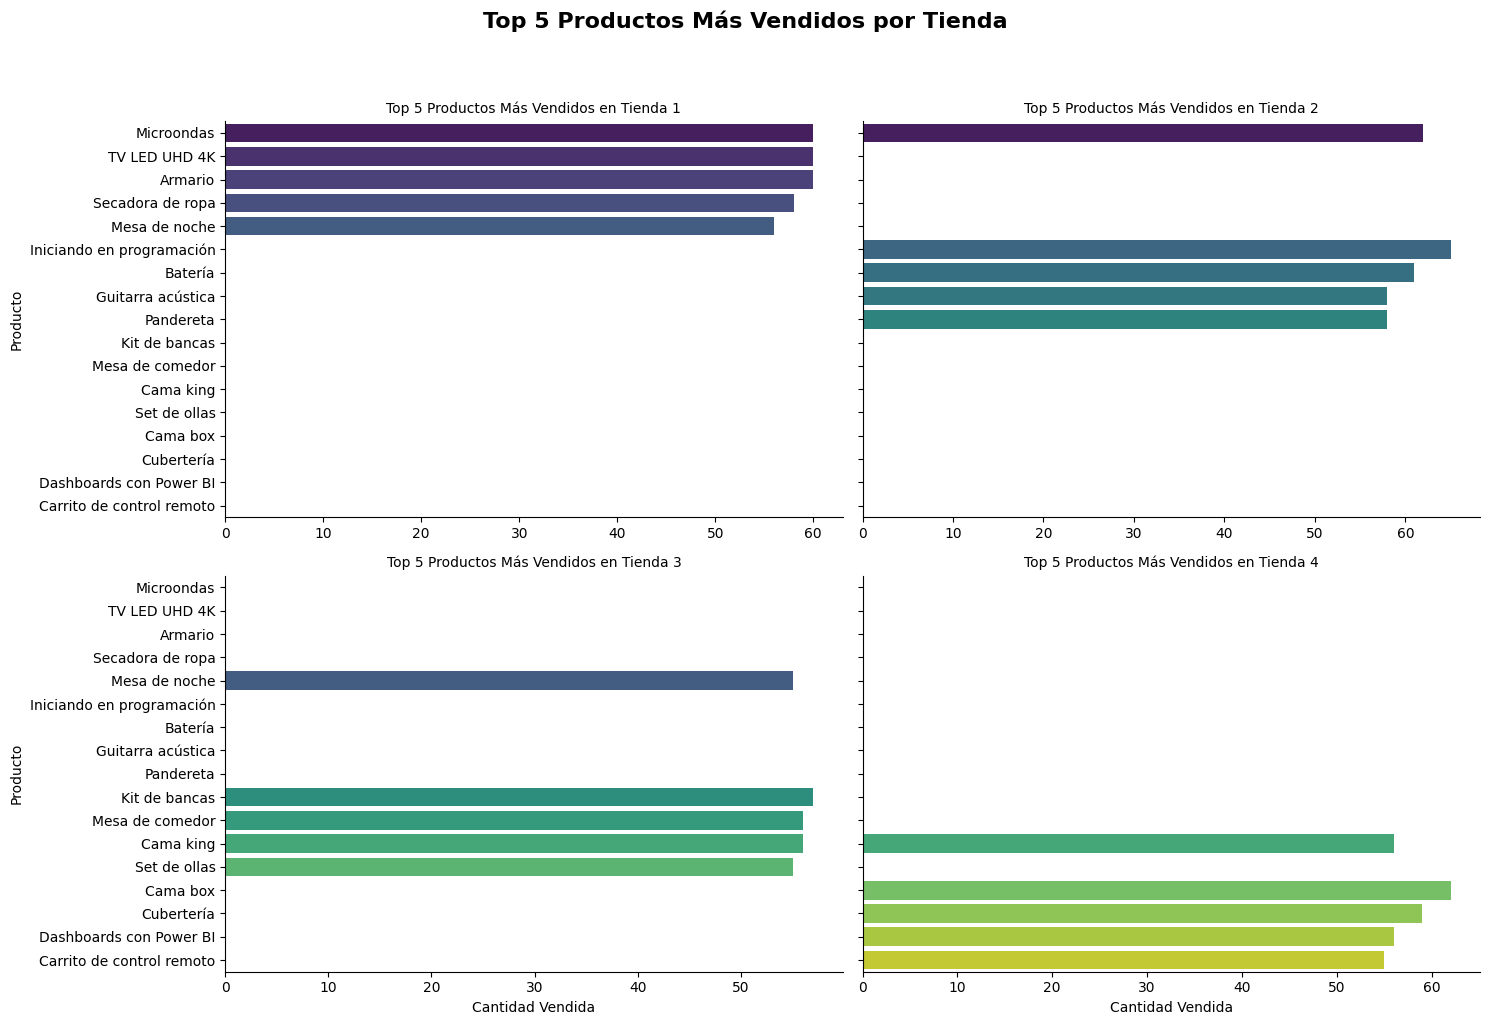

In [88]:
if 'df_total' not in locals():
    all_stores_df = []
    for nombre, df_store in dfs.items():
        df_temp = df_store.copy()
        df_temp['Tienda'] = nombre
        all_stores_df.append(df_temp)
    df_total = pd.concat(all_stores_df, ignore_index=True)

# Obtener los top 5 productos más vendidos por tienda
top_productos_por_tienda = []
for nombre_tienda in df_total['Tienda'].unique():
    df_tienda = df_total[df_total['Tienda'] == nombre_tienda]
    top_productos = df_tienda['Producto'].value_counts().head(5).reset_index()
    top_productos.columns = ['Producto', 'Cantidad Vendida']
    top_productos['Tienda'] = nombre_tienda
    top_productos_por_tienda.append(top_productos)

df_top_productos = pd.concat(top_productos_por_tienda, ignore_index=True)

# Crear los gráficos de barras facetados para cada tienda
g = sns.catplot(
    data=df_top_productos,
    x='Cantidad Vendida',
    y='Producto',
    hue='Producto', # Añadido para resolver FutureWarning y vincular color a producto
    col='Tienda',
    col_wrap=2, # Muestra 2 gráficos por fila
    kind='bar',
    palette='viridis',
    height=5, # Altura de cada subplot
    aspect=1.5, # Relación de aspecto de cada subplot
    sharex=False, # Permite que cada gráfico tenga su propio eje x
    legend=False # Desactivar la leyenda, ya que los productos están en el eje y
)

# Añade títulos y etiquetas para mayor claridad
g.set_axis_labels('Cantidad Vendida', 'Producto')
g.set_titles('Top 5 Productos Más Vendidos en {col_name}')

plt.suptitle('Top 5 Productos Más Vendidos por Tienda', y=1.02, fontsize=16, fontweight='bold')

# Mejora el diseño para evitar que las etiquetas se superpongan
plt.tight_layout(rect=[0, 0, 1, 0.98])

# Muestra el gráfico
plt.show()

# 5. Envío promedio por tienda

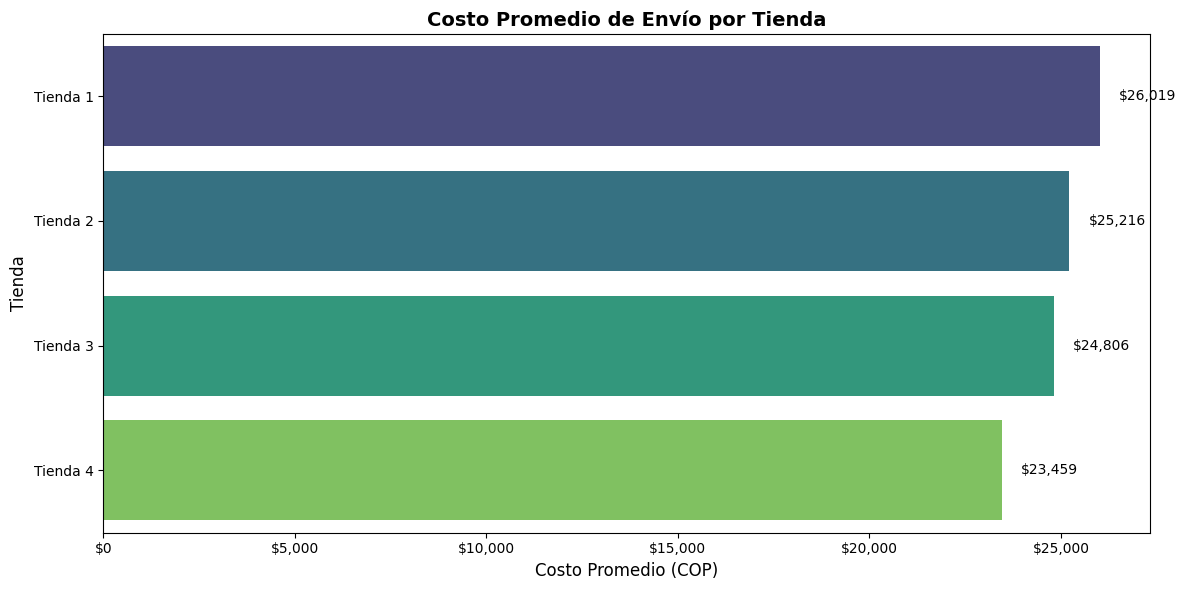

In [ ]:
import matplotlib.ticker as mticker # Importa el módulo ticker

# Promedio de costo de envío
envio_promedio = df_total.groupby('Tienda')['Costo de envío'].mean().sort_values(ascending=False)

# Gráfico
plt.figure(figsize=(12, 6))
# ¡Aquí se invierten x e y para hacerlo horizontal!
sns.barplot(x=envio_promedio.values, y=envio_promedio.index, hue=envio_promedio.index, palette='viridis', legend=False)
plt.title('Costo Promedio de Envío por Tienda', fontsize=14, fontweight='bold')
plt.xlabel('Costo Promedio (COP)', fontsize=12) # Ahora el eje X es el costo
plt.ylabel('Tienda', fontsize=12) # Ahora el eje Y son las tiendas

# Formatear el eje X como moneda (antes era el eje Y)
fmt = '${x:,.0f}'
tick = mticker.StrMethodFormatter(fmt)
plt.gca().xaxis.set_major_formatter(tick)

# Añadir etiquetas de datos al final de las barras horizontales
for index, value in enumerate(envio_promedio.values):
    # Se ajusta la posición de texto: value es la coordenada x, index es la y
    # ha='left' para alinear el texto a la izquierda del punto (value, index)
    # va='center' para centrar verticalmente el texto en la barra
    plt.text(value + 500, index, f'${value:,.0f}', ha='left', va='center', fontsize=10)

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

# **Analisis de los datos**

In [94]:
store_analysis_summary = {}

for nombre_tienda in dfs.keys():
    store_analysis_summary[nombre_tienda] = {
        "Facturación Total": ranking_facturacion.get(nombre_tienda, "N/A"),
        "Calificación Promedio": calificacion_promedio.get(nombre_tienda, "N/A"),
        "Costo Promedio de Envío": envio_promedio.get(nombre_tienda, "N/A"),
        "Top 3 Categorías Más Populares": df_top_categories[df_top_categories['Tienda'] == nombre_tienda].to_dict('records'),
        "Top 5 Productos Más Vendidos": df_top_productos[df_top_productos['Tienda'] == nombre_tienda].to_dict('records'),
        "Top 5 Productos Menos Vendidos": df_bottom_productos[df_bottom_productos['Tienda'] == nombre_tienda].to_dict('records'),
        "Ventas Totales por Categoría": combined_sales_df[combined_sales_df['Store'] == nombre_tienda].to_dict('records')
    }

# Print the consolidated summary
import json
print(json.dumps(store_analysis_summary, indent=4, ensure_ascii=False))

{
    "Tienda 1": {
        "Facturación Total": 1150880400.0,
        "Calificación Promedio": 3.976685036032217,
        "Costo Promedio de Envío": 26018.60958033065,
        "Top 3 Categorías Más Populares": [
            {
                "Categoría del Producto": "Muebles",
                "Cantidad Vendida": 465,
                "Tienda": "Tienda 1"
            },
            {
                "Categoría del Producto": "Electrónicos",
                "Cantidad Vendida": 448,
                "Tienda": "Tienda 1"
            },
            {
                "Categoría del Producto": "Juguetes",
                "Cantidad Vendida": 324,
                "Tienda": "Tienda 1"
            }
        ],
        "Top 5 Productos Más Vendidos": [
            {
                "Producto": "Microondas",
                "Cantidad Vendida": 60,
                "Tienda": "Tienda 1"
            },
            {
                "Producto": "TV LED UHD 4K",
                "Cantidad Vendida": 60,
  

## Análisis Comparativo de Tiendas

### Comparación detallada entre las cuatro tiendas utilizando los datos consolidados, identificando patrones de rendimiento y áreas de debilidad.


## Recomendación de Venta

Basándonos en el análisis comparativo de las métricas clave, podemos identificar la tienda con el peor desempeño general.

**Métricas Clave Observadas:**

*   **Facturación Total:**
    *   Tienda 1: $1,150,880,400
    *   Tienda 2: $1,116,343,500
    *   Tienda 3: $1,098,019,600
    *   Tienda 4: $1,038,375,700 (la más baja)

*   **Calificación Promedio:**
    *   Tienda 1: 3.98 (la más baja)
    *   Tienda 2: 4.04
    *   Tienda 3: 4.05 (la más alta)
    *   Tienda 4: 4.00

*   **Costo Promedio de Envío:**
    *   Tienda 1: $26,019 (el más alto)
    *   Tienda 2: $25,216
    *   Tienda 3: $24,806
    *   Tienda 4: $23,459 (el más bajo)


**Análisis Integrado y Recomendación:**

Aunque la **Tienda 4** presenta el costo promedio de envío más bajo, lo que podría parecer una ventaja, es crucial destacar que tiene la **facturación total más baja** de todas las tiendas. Su calificación promedio, aunque no es la más baja, tampoco la compensa significativamente.

Por otro lado, la **Tienda 1** tiene la **calificación promedio más baja** y el **costo promedio de envío más alto**. A pesar de tener la facturación más alta, estos dos factores (baja satisfacción del cliente y altos costos operativos de envío) representan desafíos significativos para su rentabilidad y sostenibilidad a largo plazo.

Considerando estos puntos, la **Tienda 1** es la candidata más fuerte para la venta o una reestructuración profunda. Si bien su facturación es la más alta, la combinación de la **peor calificación del cliente** y el **mayor costo de envío** sugiere problemas fundamentales en la experiencia del cliente y la eficiencia operativa. Una baja calificación puede impactar negativamente las ventas futuras y la reputación, mientras que los altos costos de envío erosionan los márgenes de beneficio. Priorizar la venta de la Tienda 1 permitiría a la empresa redirigir recursos a las otras tiendas con mejor balance entre facturación, calificación y eficiencia de costos.

**Por lo tanto, se recomienda la venta de la Tienda 1** debido a la combinación de la calificación promedio más baja y el costo promedio de envío más alto, lo que indica problemas subyacentes de satisfacción del cliente y eficiencia operativa que podrían limitar su crecimiento y rentabilidad a pesar de su alta facturación.

## Análisis y Recomendación Estratégica

### 1. Resumen Comparativo de Métricas Clave por Tienda

A continuación, se presenta una tabla comparativa de las métricas clave para cada tienda:

| Tienda | Facturación Total (COP) | Calificación Promedio | Costo Promedio de Envío (COP) |
|--------|-------------------------|-----------------------|-------------------------------|
| Tienda 1 | $1,150,880,400.00      | 3.98                  | $26,018.61                    |
| Tienda 2 | $1,116,343,500.00      | 4.04                  | $25,216.24                    |
| Tienda 3 | $1,098,019,600.00      | 4.05                  | $24,805.68                    |
| Tienda 4 | $1,038,375,700.00      | 4.00                  | $23,459.46                    |

_Nota: Los valores han sido redondeados para una mejor visualización._

### 2. Tienda de Menor Rendimiento Identificada

Aunque **Tienda 4** presenta la menor facturación total, un análisis más profundo de otras métricas operativas y de satisfacción del cliente nos lleva a identificar a **Tienda 1** como la de menor rendimiento en términos de eficiencia y experiencia del cliente.

### 3. Recomendación Estratégica

Se recomienda la **venta de la Tienda 1**.

### 4. Justificación Detallada para la Venta de la Tienda 1

La decisión de recomendar la venta de la Tienda 1 se basa en los siguientes puntos clave, a pesar de tener la mayor facturación:

*   **Calificación Promedio más Baja:** Con una calificación promedio de **3.98**, la Tienda 1 tiene la menor satisfacción del cliente entre todas las tiendas. Una calificación baja puede indicar problemas recurrentes con la calidad del producto, el servicio al cliente, o la experiencia general de compra, lo que podría afectar su viabilidad a largo plazo y la reputación de la marca.

*   **Costo Promedio de Envío más Alto:** La Tienda 1 registra el costo promedio de envío más elevado, ascendiendo a **$26,018.61 COP**. Este alto costo puede erosionar los márgenes de beneficio y hacer que los precios finales para el cliente sean menos competitivos, impactando negativamente en el volumen de ventas y la rentabilidad neta, a pesar de su alta facturación bruta. Un alto costo de envío también puede ser un factor determinante en la baja calificación de los clientes.

*   **Análisis de Categorías y Productos (Tienda 1):**
    *   **Top 3 Categorías Más Populares:** Muebles (465 ventas), Electrónicos (448 ventas), Juguetes (324 ventas).
    *   **Top 5 Productos Menos Vendidos:** 'Ciencia de datos con Python' (39), 'Pandereta' (36), 'Olla de presión' (35), 'Auriculares con micrófono' (33), 'Celular ABXY' (33).
    *   Las categorías más populares son comunes entre las tiendas, pero el **alto costo de envío** y la **baja calificación** sugieren que la Tienda 1 podría estar enfrentando ineficiencias logísticas o problemas de calidad en sus productos que impactan directamente al cliente. La combinación de alto volumen en categorías como Electrónicos y Muebles (que suelen tener costos de envío más altos) y una gestión ineficiente de estos costos, junto con una menor satisfacción general del cliente, la posiciona como la candidata principal para desinversión.

*   **Contraste con Tienda 4:** Aunque Tienda 4 tiene la facturación más baja, sus métricas de Calificación Promedio (4.00) y Costo Promedio de Envío ($23,459.46 COP) son más favorables que las de Tienda 1. Esto sugiere que Tienda 4, aunque menos voluminosa, podría ser más eficiente o tener clientes más satisfechos, lo que la haría más atractiva para una reestructuración o inversión en lugar de una venta.

En conclusión, a pesar de que la Tienda 1 tiene la mayor facturación, sus ineficiencias operativas reflejadas en los altos costos de envío y, más críticamente, su baja calificación promedio, la identifican como la tienda con el mayor riesgo y el menor potencial de mejora a largo plazo sin una inversión sustancial y reestructuración, haciendo que su venta sea la recomendación más estratégica para el portafolio general.